[View in Colaboratory](https://colab.research.google.com/github/cameronboy/personal_site/blob/master/Housing_Index_LSTM.ipynb)

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [6]:
# Data set
housing_index_url = "https://www.fhfa.gov/DataTools/Downloads/Documents/HPI/HPI_master.csv"
dataset = pd.read_csv(housing_index_url)

# Just pulling in data to start for Denver
denver = dataset[dataset["place_name"].str.contains("Denver")]

# Creating an numpy array
data = denver['index_nsa'].values.astype('float32')

# First 20 Rows
data[:20]


# Normalizing our dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)) # Have to reshape it as fit_transform expects a 2d array



#split into train and test sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(dataset),:]
print(len(train), len(test))




def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back),0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)



look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX,  (testX.shape[0], 1, testX.shape[1]))

260 129


In [7]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=2)

Epoch 1/1000
 - 1s - loss: 0.0680
Epoch 2/1000
 - 0s - loss: 0.0595
Epoch 3/1000
 - 0s - loss: 0.0511
Epoch 4/1000
 - 0s - loss: 0.0435
Epoch 5/1000
 - 0s - loss: 0.0371
Epoch 6/1000
 - 0s - loss: 0.0315
Epoch 7/1000
 - 0s - loss: 0.0265
Epoch 8/1000
 - 0s - loss: 0.0225
Epoch 9/1000
 - 0s - loss: 0.0192
Epoch 10/1000
 - 0s - loss: 0.0165
Epoch 11/1000
 - 0s - loss: 0.0144
Epoch 12/1000
 - 0s - loss: 0.0127
Epoch 13/1000
 - 0s - loss: 0.0115
Epoch 14/1000
 - 0s - loss: 0.0105
Epoch 15/1000
 - 0s - loss: 0.0097
Epoch 16/1000
 - 0s - loss: 0.0091
Epoch 17/1000
 - 0s - loss: 0.0087
Epoch 18/1000
 - 0s - loss: 0.0083
Epoch 19/1000
 - 0s - loss: 0.0080
Epoch 20/1000
 - 0s - loss: 0.0077
Epoch 21/1000
 - 0s - loss: 0.0075
Epoch 22/1000
 - 0s - loss: 0.0073
Epoch 23/1000
 - 0s - loss: 0.0070
Epoch 24/1000
 - 0s - loss: 0.0068
Epoch 25/1000
 - 0s - loss: 0.0066
Epoch 26/1000
 - 0s - loss: 0.0064
Epoch 27/1000
 - 0s - loss: 0.0062
Epoch 28/1000
 - 0s - loss: 0.0060
Epoch 29/1000
 - 0s - loss: 0

In [8]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# # invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_p = scaler.inverse_transform(trainY_p)
testPredict = scaler.inverse_transform(testPredict)
testY_p = scaler.inverse_transform(testy)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_p[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_p[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: ignored

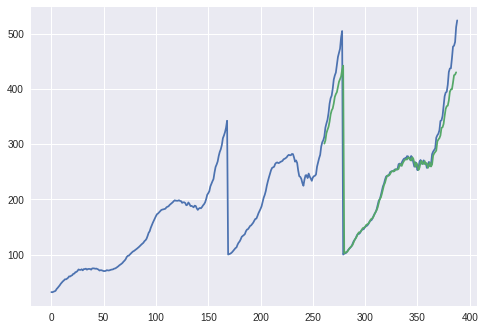

In [63]:
#shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [1]:
model.predict([345.1])

NameError: ignored